(CONFIDENTIAL) INTERNAL USE ONLY, NOT FOR EXTERNAL DISTRIBUTION

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

# Dimension Reduction 

In [ ]:
# Data dimensionality reduction

# Data visualization

# Preprocessing for supervised learning

## Randomized projection

In [ ]:
# ~1M -> ~1K 

In [13]:
from sklearn import random_projection, datasets, metrics

In [6]:
X, Y = datasets.make_blobs(100, n_features=100000, centers=2, random_state=1)

In [7]:
X.shape, Y.shape

((100, 100000), (100,))

In [30]:
rp_grp = random_projection.GaussianRandomProjection(random_state=1, eps=0.05)

In [31]:
rp_grp.fit(X)

GaussianRandomProjection(eps=0.05, n_components='auto', random_state=1)

In [40]:
random_projection.johnson_lindenstrauss_min_dim(100, eps=0.05)

15244

In [29]:
import numpy as np
np.log(100) / (0.1 ** 2 - 0.1 ** 3)

511.685576220899

In [32]:
rp_grp.n_components_

15244

In [9]:
rp_grp.n_components_

3947

In [33]:
rp_grp.components_.shape

(15244, 100000)

In [34]:
Xnew = rp_grp.transform(X)

In [12]:
Xnew.shape

(100, 3947)

In [43]:
rp_srp = random_projection.SparseRandomProjection(random_state=1, eps=0.1)

In [44]:
X.shape

(100, 100000)

In [45]:
rp_srp.fit(X)

SparseRandomProjection(dense_output=False, density='auto', eps=0.1,
            n_components='auto', random_state=1)

In [46]:
Xnew = rp_srp.transform(X)

In [49]:
rp_srp.components_

<3947x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 1247704 stored elements in Compressed Sparse Row format>

In [51]:
1247704./(3947*100000)

0.0031611451735495313

In [ ]:
# 老师能否再讲下sparse matrix原理，刚刚没有听清。上次作业里one hot encoding也讲到sparse matrix但还是不大懂

In [ ]:
# 10 * 10 => 100 points
# [0, 0, 0, 10, 0, 0, 0, 100]
# (10, 10) (20, 2, 10)  # 2 * 4 = 8 

# only save non-zero elements (index + value)
# [(0, 3), 10], [(1, 3), 100]

In [50]:
rp_srp.density_

0.003162277660168379

In [47]:
Xdist = metrics.pairwise.pairwise_distances(X)
Xnewdist = metrics.pairwise.pairwise_distances(Xnew)

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

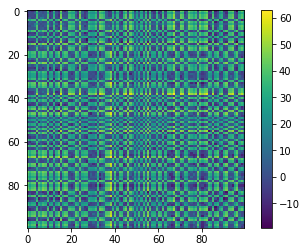

In [25]:
plt.imshow(Xnewdist - Xdist)
plt.colorbar()

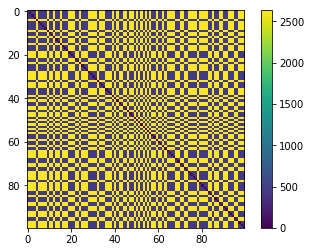

In [24]:
plt.imshow(Xdist)
plt.colorbar()

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


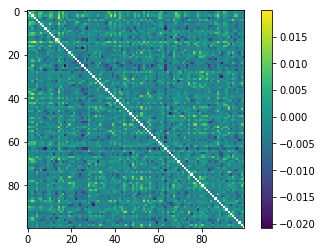

In [37]:
Xdiff = (Xnewdist - Xdist) / Xdist
plt.imshow(Xdiff)
plt.colorbar()

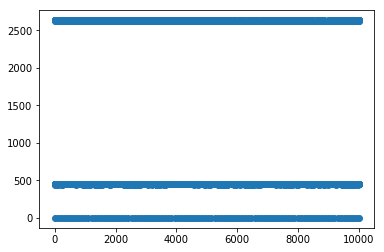

In [55]:
plt.scatter(range(len(Xdist.ravel())), Xdist.ravel())

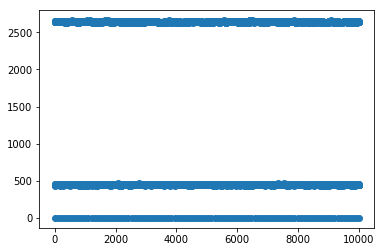

In [57]:
plt.scatter(range(len(Xnewdist.ravel())), Xnewdist.ravel())

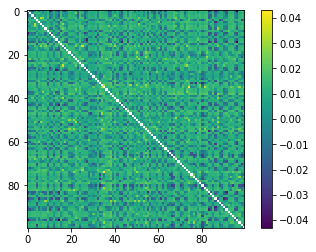

In [28]:
Xdiff = (Xnewdist - Xdist) / Xdist
plt.imshow(Xdiff)
plt.colorbar()

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


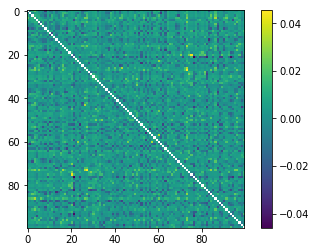

In [48]:
Xdiff = (Xnewdist - Xdist) / Xdist
plt.imshow(Xdiff)
plt.colorbar()

In [58]:
# 用降维以后的training set学习得到model以后，怎么用在test set上呢？
# 也要对test set降维？train和test降维的矩阵不一样，会影响model的performance吗?

rp_srp.components_.shape

# 有次作业 让大家看这个techique 
# https://www.kaggle.com/gugubear/principal-component-analysis-with-kmeans-visuals
# 但是我不是很懂这里用了PCA,再用cluster technique 结果代表什么呢

(3947, 100000)

In [ ]:
# How minimum dimension changes? along with data points number & accuracy

In [ ]:
# How the components looks like in this model? 

In [ ]:
# bag of words, generate featrue
# n-gram feature extraction (I am going out: "I am", "am going", "going out") ~ 100 K

In [ ]:
# How it process RP? 

In [ ]:
# Excercise: play with n_cluster = 3, how the distances looks different? 
# how about n_cluster = 4?

## Principle component analysis

/Users/peter/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  if __name__ == '__main__':


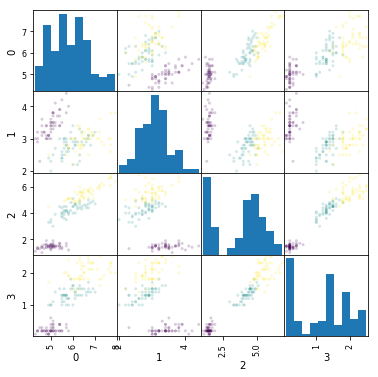

In [60]:
# visualize data through scatterplot 
import pandas as pd
from pandas.tools.plotting import scatter_matrix

data = datasets.load_iris()
X = data.data
Y = data.target

_ = scatter_matrix(pd.DataFrame(X), alpha=0.2, figsize=(6, 6), diagonal='hist', c=Y)

### Linear PCA

In [61]:
from sklearn import decomposition

In [69]:
d_pca = decomposition.PCA(n_components=2, random_state=1)

In [70]:
d_pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=1,
  svd_solver='auto', tol=0.0, whiten=False)

In [65]:
d_pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647],
       [-0.58099728,  0.59641809,  0.07252408,  0.54906091],
       [ 0.31725455, -0.32409435, -0.47971899,  0.75112056]])

In [68]:
d_pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

In [72]:
d_pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [73]:
d_pca.explained_variance_

array([4.22484077, 0.24224357])

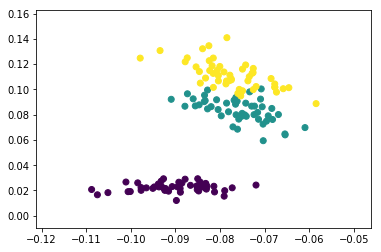

In [95]:
Xnew = d_spca.transform(X)
plt.scatter(Xnew[:,0], Xnew[:,1], c=Y)

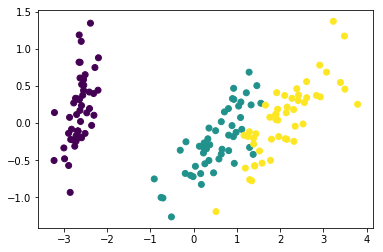

In [93]:
d_spca = decomposition.SparsePCA(n_components=2, alpha=1)

In [94]:
d_spca.fit(X)

SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=2, n_jobs=1, random_state=None, ridge_alpha=0.01,
     tol=1e-08, verbose=False)

In [71]:
d_pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [81]:
d_spca.components_

array([[-49.14862059, -36.69749027,  -3.52258742,   0.        ],
       [ 24.42800599,   0.        ,  46.75147146,  16.17804638]])

In [86]:
d_spca.components_

array([[-52.84649392, -27.46600139,   0.        ,   0.        ],
       [  9.95969191,   0.        ,  40.8213911 ,   7.10463005]])

In [92]:
d_spca.components_

array([[-52.13307467, -16.51622437, -29.10689132,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ]])

In [83]:
# d_spca.error_

In [77]:
# Process (SVD approach)
X1 = X - np.mean(X, axis=0)

# SVD over matrix 
U, S, V = np.linalg.svd(X1, full_matrices=False)

# directly get explained varience 
explained_variance_ = (S ** 2) / X1.shape[0]

# compare with PCA's eighen vector
# explained_variance_

In [ ]:
# Recover the first most important components
m = 1

U1 = U[:, :m]
V1 = V[:m, :]
S1 = S[:m]
print U1.shape, S1.shape, V1.shape

In [ ]:
# How PCA works? 
# Step 1. data are normalized by mean
# Step 2. Covarience matrix is calculated
# Step 3. Eig value & vectors are extracted
# Step 4. Sort by the eig values


In [ ]:
# Excercise: try run PCA for this data, see how it looks like: the transformed result & explained variance ratio
# changing the d, see how it (varience explained) looks like
N = 100
d = 10.
x = np.random.normal(size=N).reshape([N,1])
y = (np.random.normal(size=N) * d).reshape([N,1])
data = np.hstack([x,y])

### Randomized PCA

In [ ]:
# what if only need a small amount of PCs? 

In [ ]:
# time difference

In [ ]:
# https://web.stanford.edu/group/mmds/slides2010/Martinsson.pdf

### Incremental PCA

In [ ]:
# what if data is huge!
# batch process

### Kernal PCA

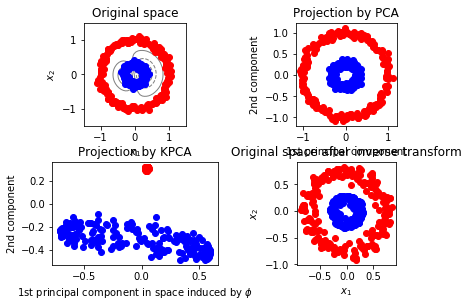

In [96]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=400, factor=.3, noise=.05)

kpca = decomposition.KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)
X_back = kpca.inverse_transform(X_kpca)
pca = decomposition.PCA()
X_pca = pca.fit_transform(X)

# Plot results

plt.figure()
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.plot(X[reds, 0], X[reds, 1], "ro")
plt.plot(X[blues, 0], X[blues, 1], "bo")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

X1, X2 = np.meshgrid(np.linspace(-1.5, 1.5, 50), np.linspace(-1.5, 1.5, 50))
X_grid = np.array([np.ravel(X1), np.ravel(X2)]).T
# projection on the first principal component (in the phi space)
Z_grid = kpca.transform(X_grid)[:, 0].reshape(X1.shape)
plt.contour(X1, X2, Z_grid, colors='grey', linewidths=1, origin='lower')

plt.subplot(2, 2, 2, aspect='equal')
plt.plot(X_pca[reds, 0], X_pca[reds, 1], "ro")
plt.plot(X_pca[blues, 0], X_pca[blues, 1], "bo")
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

plt.subplot(2, 2, 3, aspect='equal')
plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

plt.subplot(2, 2, 4, aspect='equal')
plt.plot(X_back[reds, 0], X_back[reds, 1], "ro")
plt.plot(X_back[blues, 0], X_back[blues, 1], "bo")
plt.title("Original space after inverse transform")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.subplots_adjust(0.02, 0.10, 0.98, 0.94, 0.04, 0.35)

plt.show()

In [ ]:
# linear discriminator是 linear classifier (logistic regression, ...)

In [ ]:
# https://cseweb.ucsd.edu/classes/fa01/cse291/kernelPCA_article.pdf

## Manifold learning

### MDS

In [ ]:
# Multidimensional Scaling
# Principle: optimize "stress" along with configuration search
# Require n_components provided
# Optional: dissimilarity metrics

In [97]:
from sklearn import datasets
data = datasets.make_blobs(n_samples=1000, n_features=10, centers=3, random_state=0)
data[0].shape
# plt.plot(data[0], data[1], '.', ms=10);

(1000, 10)

In [98]:
from sklearn import manifold

/Users/peter/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [101]:
m_mds = manifold.MDS(random_state=1)

In [102]:
m_mds.fit(data[0])

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=1, verbose=0)

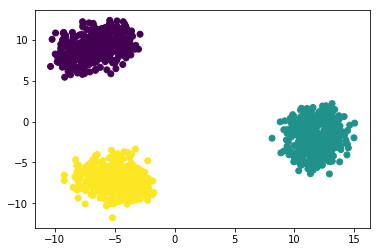

In [108]:
# m_mds.dissimilarity_matrix_
plt.scatter(m_mds.embedding_[:,0], m_mds.embedding_[:,1], c=data[1])

In [110]:
m_mds.stress_

799446.2779471076

In [ ]:
# how the _stress changes

### IsoMap

In [ ]:
# Isometric Mapping
# Principle: use minimum path search to get "local" connection distance, then MDS or kernal PCA
# nearest neighbour + minimum distance calculation
# Require n_neighbors, n_components
# Optional: dissimilarity metrics

# 1. Construct neighborhood graph ['auto'|'brute'|'kd_tree'|'ball_tree']
# 2. Compute shortest paths ['auto'|'FW'|'D']
# 3. Construct d-dimensional embedding

In [ ]:
# http://wearables.cc.gatech.edu/paper_of_week/isomap.pdf

In [111]:
X, Y = datasets.make_swiss_roll(1000, random_state=1)

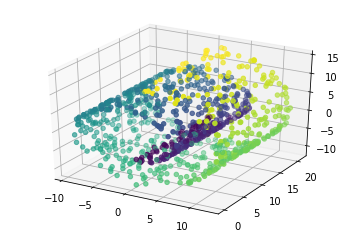

In [113]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=Y)

In [114]:
m_mds = manifold.MDS(random_state=1)
m_iso = manifold.Isomap()

In [115]:
m_mds.fit(X)

MDS(dissimilarity='euclidean', eps=0.001, max_iter=300, metric=True,
  n_components=2, n_init=4, n_jobs=1, random_state=1, verbose=0)

In [116]:
m_iso.fit(X)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

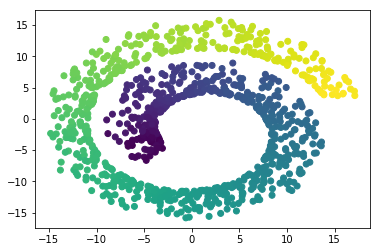

In [117]:
plt.scatter(m_mds.embedding_[:,0], m_mds.embedding_[:,1], c=Y)

In [138]:
m_iso = manifold.Isomap(n_neighbors=20)

In [139]:
m_iso.fit(X)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=1,
    n_neighbors=20, neighbors_algorithm='auto', path_method='auto', tol=0)

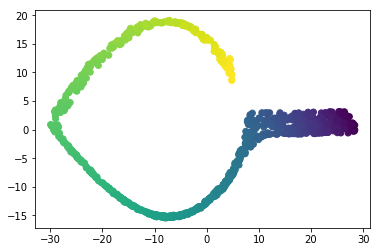

In [140]:
plt.scatter(m_iso.embedding_[:,0], m_iso.embedding_[:,1], c=Y)

In [ ]:
# compare PCA and IsoMap and MDS

### Local linear embedding

In [ ]:
# Nearest neighbour search
# Local distance construct local PCA
# 

In [ ]:
# changing the n_neighbors
%%time
mi = manifold.LocallyLinearEmbedding(n_neighbors=999)
Xnew = mi.fit_transform(X)
plt.scatter(Xnew[:,0], Xnew[:,1], c=Y)

### t-SNE

In [ ]:
# changing the n_neighbors
# based on retain the probability between each pair